## GRIP - The Spark Foundation  

#### Data Science and Business Analytics Intern - JUNE'2023
#### Task 1 : Prediction Using Spuervised ML
#### Author : Anupam kumar singh

#### Dataset used : Student Scores
  * it can be downloaded through the following link -http://bit.ly/w-data 

##### In this task we have to predict the percentage score of a student based on the number of hours studied. The task has two variables where the feature is the no. of hours studied and the target value is the percentage score. This can be solved using simple linear regression.

In [3]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#### Reading the CSV dataset as a pandas dataframe

In [4]:
url= "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head()   #checks top 5 rows

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.shape   #view the shape .i.e number of rows and columns

(25, 2)

In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### visulalize the data

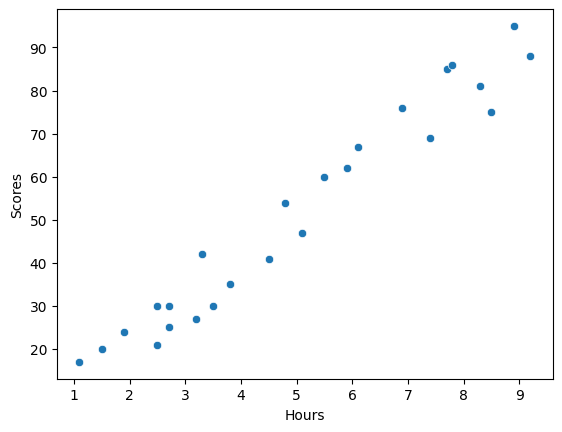

In [8]:
sns.scatterplot(x=data['Hours'], y=data['Scores']);  #plot the data

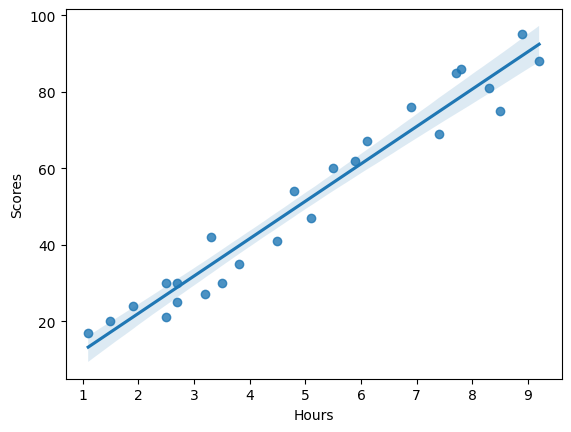

In [9]:
sns.regplot(x=data['Hours'], y=data['Scores']);  #Regression plot gives a better and clear visualization for such data

### Seprate feature and target

In [36]:
x= data[['Hours']]
y= data['Scores']

### Train-Test Split

In [37]:
from sklearn.model_selection import train_test_split
train_x ,val_x,train_y , val_y = train_test_split(x,y, random_state = 0)

### Model Building

In [38]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [39]:
regressor.fit(train_x , train_y)  ##train the model

LinearRegression()

In [40]:
pred_y = regressor.predict(val_x)  ##prediction

In [41]:
pd.DataFrame({'Actual': val_y, 'predicted': pred_y})  ##view actual and predicted on test set side-by-side

,Actual,predicted
5,20,16.844722
2,27,33.745575
19,69,75.500624
16,30,26.786400
11,62,60.588106
22,35,39.710582
17,24,20.821393


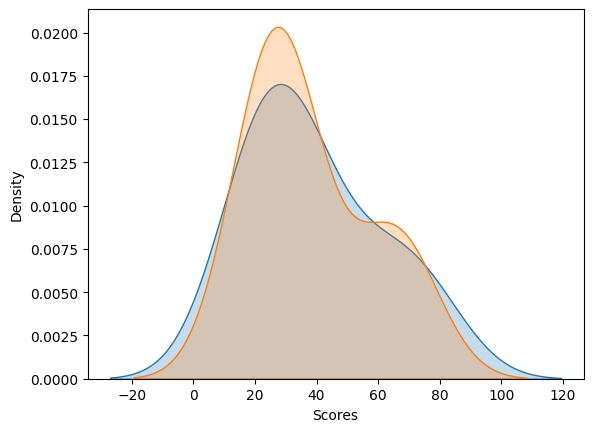

In [43]:
#Actual value vs Predicted distribution plot

sns.kdeplot(pred_y, label="predicted",shade=True);
sns.kdeplot(data=val_y, label="Actual", shade=True);

In [44]:
print('Train accuracy: ',regressor.score(train_x,train_y), '\nTest accuracy : ',regressor.score(val_x,val_y))

Train accuracy:  0.9484509249326872 
Test accuracy :  0.9367661043365055


In [45]:
#predict percentage for custom input value for hours
#Q. What will be predicted score if a student studies for 9.25 hrs/day ?

h= [[9.25]]
s= regressor.predict(h)
print('A student who studies ',h[0][0], 'hours is estimated to score ',s[0])

A student who studies  9.25 hours is estimated to score  93.89272889341655
